In [1]:
import os
import csv
import sys
import scipy.optimize as opt
import scipy.stats as stat
from operator import itemgetter
import random
import numpy as np
import numpy.ma as ma
import numpy.linalg as la
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [8]:
os.chdir('/Volumes/McKenna_Mac_Partition/Confocal_Data/MPT/3_13_18_60nm_PS_PEG_in_brain_tissue/')
print(os.getcwd())

/Volumes/McKenna_Mac_Partition/Confocal_Data/MPT/3_13_18_60nm_PS_PEG_in_brain_tissue


In [6]:
time = np.linspace(0,650/99.93, 650)
print(len(time))

650


In [9]:
cortex_1_raw = np.genfromtxt('msd_60_nm_PS_PEG_in_cortex_vid_1_1.csv',delimiter = ',')
cortex_1_raw = ma.masked_invalid(cortex_1_raw)
cortex_1 = np.zeros((650, ma.max(cortex_1_raw[:,4])+1))
i = 0
while i < len(cortex_1_raw):
    if ma.is_masked(cortex_1_raw[i,3]) == False:
        traj = cortex_1_raw[i,4]
        frame = cortex_1_raw[i,1]
        cortex_1[frame,traj] = cortex_1_raw[i,3]
    i+=1
cortex_1 = ma.masked_where(cortex_1 == 0, cortex_1)
cortex_1_avg = np.zeros((len(cortex_1)))
cortex_1_avg = (ma.mean(cortex_1, axis=1)*(0.16**2))

cortex_1_Deff = np.zeros((cortex_1.shape[0],cortex_1.shape[1]))
i = 0
while i < cortex_1_Deff.shape[1]:
    cortex_1_Deff[:,i] = cortex_1[:,i]/4/time[:]
    i +=1
    
cortex_1_Deff = ma.masked_where(cortex_1_Deff == 0, cortex_1_Deff)
cortex_1_Deff = ma.log10(cortex_1_Deff)

/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [10]:
cortex_2_raw = np.genfromtxt('msd_60_nm_PS_PEG_in_cortex_vid_1_2.csv',delimiter = ',')
cortex_2_raw = ma.masked_invalid(cortex_2_raw)
cortex_2 = np.zeros((650, ma.max(cortex_2_raw[:,4])+1))
i = 0
while i < len(cortex_2_raw):
    if ma.is_masked(cortex_2_raw[i,3]) == False:
        traj = cortex_2_raw[i,4]
        frame = cortex_2_raw[i,1]
        cortex_2[frame,traj] = cortex_2_raw[i,3]
    i+=1
cortex_2 = ma.masked_where(cortex_2 == 0, cortex_2)
cortex_2_avg = np.zeros((len(cortex_2)))
cortex_2_avg = (ma.mean(cortex_2, axis=1)*(0.16**2))

cortex_2_Deff = np.zeros((cortex_2.shape[0],cortex_2.shape[1]))
i = 0
while i < cortex_2_Deff.shape[1]:
    cortex_2_Deff[:,i] = cortex_2[:,i]/4/time[:]
    i +=1
    
cortex_2_Deff = ma.masked_where(cortex_2_Deff == 0, cortex_2_Deff)
cortex_2_Deff = ma.log10(cortex_2_Deff)

/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [11]:
cortex_3_raw = np.genfromtxt('msd_60_nm_PS_PEG_in_cortex_vid_1_3.csv',delimiter = ',')
cortex_3_raw = ma.masked_invalid(cortex_3_raw)
cortex_3 = np.zeros((650, ma.max(cortex_3_raw[:,4])+1))
i = 0
while i < len(cortex_3_raw):
    if ma.is_masked(cortex_3_raw[i,3]) == False:
        traj = cortex_3_raw[i,4]
        frame = cortex_3_raw[i,1]
        cortex_3[frame,traj] = cortex_3_raw[i,3]
    i+=1
cortex_3 = ma.masked_where(cortex_3 == 0, cortex_3)
cortex_3_avg = np.zeros((len(cortex_3)))
cortex_3_avg = (ma.mean(cortex_3, axis=1)*(0.16**2))

cortex_3_Deff = np.zeros((cortex_3.shape[0],cortex_3.shape[1]))
i = 0
while i < cortex_3_Deff.shape[1]:
    cortex_3_Deff[:,i] = cortex_3[:,i]/4/time[:]
    i +=1
    
cortex_3_Deff = ma.masked_where(cortex_3_Deff == 0, cortex_3_Deff)
cortex_3_Deff = ma.log10(cortex_3_Deff)

/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [12]:
hippo_1_raw = np.genfromtxt('msd_60_nm_PS_PEG_in_hippocampus_vid_1_1.csv',delimiter = ',')
hippo_1_raw = ma.masked_invalid(hippo_1_raw)
hippo_1 = np.zeros((650, ma.max(hippo_1_raw[:,4])+1))
i = 0
while i < len(hippo_1_raw):
    if ma.is_masked(hippo_1_raw[i,3]) == False:
        traj = hippo_1_raw[i,4]
        frame = hippo_1_raw[i,1]
        hippo_1[frame,traj] = hippo_1_raw[i,3]
    i+=1
hippo_1 = ma.masked_where(hippo_1 == 0, hippo_1)
hippo_1_avg = np.zeros((len(hippo_1)))
hippo_1_avg = (ma.mean(hippo_1, axis=1)*(0.16**2))

hippo_1_Deff = np.zeros((hippo_1.shape[0],hippo_1.shape[1]))
i = 0
while i < hippo_1_Deff.shape[1]:
    hippo_1_Deff[:,i] = hippo_1[:,i]/4/time[:]
    i +=1
    
hippo_1_Deff = ma.masked_where(hippo_1_Deff == 0, hippo_1_Deff)
hippo_1_Deff = ma.log10(hippo_1_Deff)

/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [13]:
hippo_2_raw = np.genfromtxt('msd_60_nm_PS_PEG_in_hippocampus_vid_1_2.csv',delimiter = ',')
hippo_2_raw = ma.masked_invalid(hippo_2_raw)
hippo_2 = np.zeros((650, ma.max(hippo_2_raw[:,4])+1))
i = 0
while i < len(hippo_2_raw):
    if ma.is_masked(hippo_2_raw[i,3]) == False:
        traj = hippo_2_raw[i,4]
        frame = hippo_2_raw[i,1]
        hippo_2[frame,traj] = hippo_2_raw[i,3]
    i+=1
hippo_2 = ma.masked_where(hippo_2 == 0, hippo_2)
hippo_2_avg = np.zeros((len(hippo_2)))
hippo_2_avg = (ma.mean(hippo_2, axis=1)*(0.16**2))

hippo_2_Deff = np.zeros((hippo_2.shape[0],hippo_2.shape[1]))
i = 0
while i < hippo_2_Deff.shape[1]:
    hippo_2_Deff[:,i] = hippo_2[:,i]/4/time[:]
    i +=1
    
hippo_2_Deff = ma.masked_where(hippo_2_Deff == 0, hippo_2_Deff)
hippo_2_Deff = ma.log10(hippo_2_Deff)

/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [14]:
hippo_3_raw = np.genfromtxt('msd_60_nm_PS_PEG_in_hippocampus_vid_1_3.csv',delimiter = ',')
hippo_3_raw = ma.masked_invalid(hippo_3_raw)
hippo_3 = np.zeros((650, ma.max(hippo_3_raw[:,4])+1))
i = 0
while i < len(hippo_3_raw):
    if ma.is_masked(hippo_3_raw[i,3]) == False:
        traj = hippo_3_raw[i,4]
        frame = hippo_3_raw[i,1]
        hippo_3[frame,traj] = hippo_3_raw[i,3]
    i+=1
hippo_3 = ma.masked_where(hippo_3 == 0, hippo_3)
hippo_3_avg = np.zeros((len(hippo_3)))
hippo_3_avg = (ma.mean(hippo_3, axis=1)*(0.16**2))

hippo_3_Deff = np.zeros((hippo_3.shape[0],hippo_3.shape[1]))
i = 0
while i < hippo_3_Deff.shape[1]:
    hippo_3_Deff[:,i] = hippo_3[:,i]/4/time[:]
    i +=1
    
hippo_3_Deff = ma.masked_where(hippo_3_Deff == 0, hippo_3_Deff)
hippo_3_Deff = ma.log10(hippo_3_Deff)

/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [15]:
thalamus_1_raw = np.genfromtxt('msd_60_nm_PS_PEG_in_interbrain_vid_1_1.csv',delimiter = ',')
thalamus_1_raw = ma.masked_invalid(thalamus_1_raw)
thalamus_1 = np.zeros((650, ma.max(thalamus_1_raw[:,4])+1))
i = 0
while i < len(thalamus_1_raw):
    if ma.is_masked(thalamus_1_raw[i,3]) == False:
        traj = thalamus_1_raw[i,4]
        frame = thalamus_1_raw[i,1]
        thalamus_1[frame,traj] = thalamus_1_raw[i,3]
    i+=1
thalamus_1 = ma.masked_where(thalamus_1 == 0, thalamus_1)
thalamus_1_avg = np.zeros((len(thalamus_1)))
thalamus_1_avg = (ma.mean(thalamus_1, axis=1)*(0.16**2))

thalamus_1_Deff = np.zeros((thalamus_1.shape[0],thalamus_1.shape[1]))
i = 0
while i < thalamus_1_Deff.shape[1]:
    thalamus_1_Deff[:,i] = thalamus_1[:,i]/4/time[:]
    i +=1
    
thalamus_1_Deff = ma.masked_where(thalamus_1_Deff == 0, thalamus_1_Deff)
thalamus_1_Deff = ma.log10(thalamus_1_Deff)

/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [16]:
thalamus_2_raw = np.genfromtxt('msd_60_nm_PS_PEG_in_interbrain_vid_1_2.csv',delimiter = ',')
thalamus_2_raw = ma.masked_invalid(thalamus_2_raw)
thalamus_2 = np.zeros((650, ma.max(thalamus_2_raw[:,4])+1))
i = 0
while i < len(thalamus_2_raw):
    if ma.is_masked(thalamus_2_raw[i,3]) == False:
        traj = thalamus_2_raw[i,4]
        frame = thalamus_2_raw[i,1]
        thalamus_2[frame,traj] = thalamus_2_raw[i,3]
    i+=1
thalamus_2 = ma.masked_where(thalamus_2 == 0, thalamus_2)
thalamus_2_avg = np.zeros((len(thalamus_2)))
thalamus_2_avg = (ma.mean(thalamus_2, axis=1)*(0.16**2))

thalamus_2_Deff = np.zeros((thalamus_2.shape[0],thalamus_2.shape[1]))
i = 0
while i < thalamus_2_Deff.shape[1]:
    thalamus_2_Deff[:,i] = thalamus_2[:,i]/4/time[:]
    i +=1
    
thalamus_2_Deff = ma.masked_where(thalamus_2_Deff == 0, thalamus_2_Deff)
thalamus_2_Deff = ma.log10(thalamus_2_Deff)

/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [17]:
thalamus_3_raw = np.genfromtxt('msd_60_nm_PS_PEG_in_interbrain_vid_1_3.csv',delimiter = ',')
thalamus_3_raw = ma.masked_invalid(thalamus_3_raw)
thalamus_3 = np.zeros((650, ma.max(thalamus_3_raw[:,4])+1))
i = 0
while i < len(thalamus_3_raw):
    if ma.is_masked(thalamus_3_raw[i,3]) == False:
        traj = thalamus_3_raw[i,4]
        frame = thalamus_3_raw[i,1]
        thalamus_3[frame,traj] = thalamus_3_raw[i,3]
    i+=1
thalamus_3 = ma.masked_where(thalamus_3 == 0, thalamus_3)
thalamus_3_avg = np.zeros((len(thalamus_3)))
thalamus_3_avg = (ma.mean(thalamus_3, axis=1)*(0.16**2))

thalamus_3_Deff = np.zeros((thalamus_3.shape[0],thalamus_3.shape[1]))
i = 0
while i < thalamus_3_Deff.shape[1]:
    thalamus_3_Deff[:,i] = thalamus_3[:,i]/4/time[:]
    i +=1
    
thalamus_3_Deff = ma.masked_where(thalamus_3_Deff == 0, thalamus_3_Deff)
thalamus_3_Deff = ma.log10(thalamus_3_Deff)

/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [18]:
print(ma.max(cortex_1_raw[:,4])+1)
print(ma.max(cortex_2_raw[:,4])+1)
print(ma.max(cortex_3_raw[:,4])+1)
print(ma.max(hippo_1_raw[:,4])+1)
print(ma.max(hippo_2_raw[:,4])+1)
print(ma.max(hippo_3_raw[:,4])+1)
print(ma.max(thalamus_1_raw[:,4])+1)
print(ma.max(thalamus_2_raw[:,4])+1)
print(ma.max(thalamus_3_raw[:,4])+1)

96.0
1301.0
1993.0
946.0
915.0
2515.0
1109.0
872.0
3676.0


In [51]:
cortex_avg_MSDs = np.mean([cortex_1_avg, cortex_2_avg], axis=0)
cortex_std = np.std([cortex_1_avg, cortex_2_avg], axis=0)
hippo_avg_MSDs = np.mean([hippo_1_avg, hippo_2_avg], axis=0)
hippo_std = np.std([hippo_1_avg, hippo_3_avg], axis=0)
thalamus_avg_MSDs = np.mean([thalamus_2_avg, thalamus_3_avg], axis=0)
thalamus_std = np.std([thalamus_3_avg, thalamus_2_avg], axis=0)

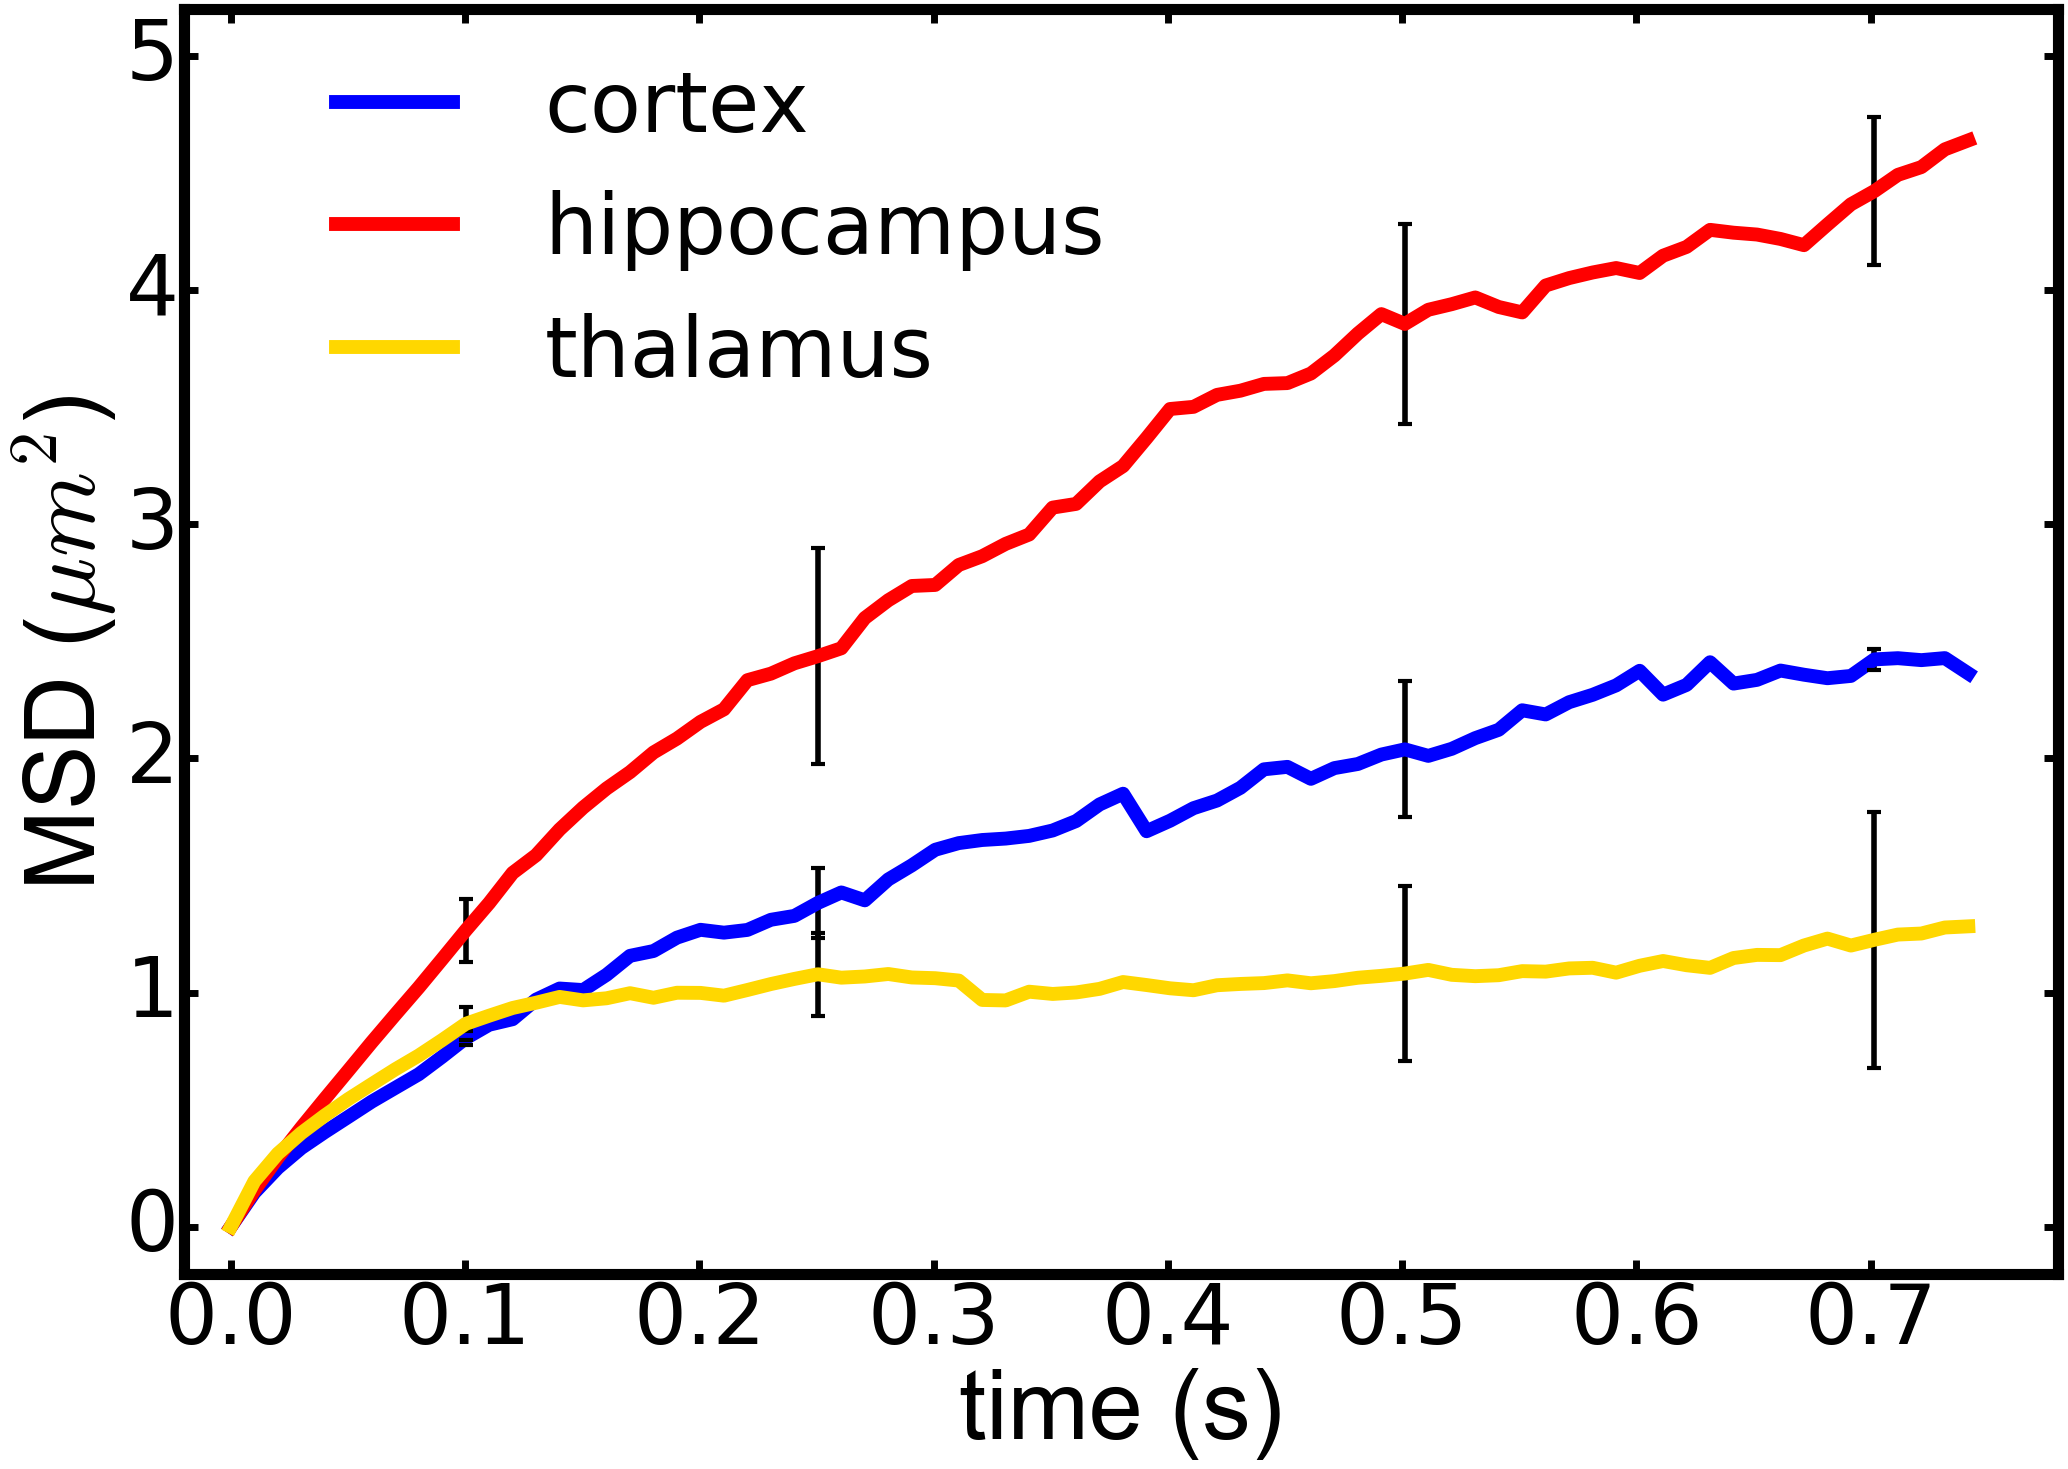

In [52]:
hfont = {'fontname':'Arial'}
fig = plt.figure(1,figsize=(22, 16), dpi=80)
ax = fig.add_subplot(111)

#ax.plot(time[0:75], cortex_1_avg[0:75], color = 'blue', linewidth=10, linestyle = '--', label = 'cortex')
#ax.plot(time[0:75], cortex_2_avg[0:75], color = 'blue', linewidth=10, linestyle = '--', label = 'cortex')
#ax.plot(time[0:75], cortex_3_avg[0:75], color = 'blue', linewidth=10, linestyle = '--', label = 'cortex')
ax.plot(time[0:75], cortex_avg_MSDs[0:75], color = 'blue', linewidth=10, label = 'cortex')
ax.errorbar(time[10], cortex_avg_MSDs[10], yerr = cortex_std[10], ecolor = 'black', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time[25], cortex_avg_MSDs[25], yerr = cortex_std[25], ecolor = 'black', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time[50], cortex_avg_MSDs[50], yerr = cortex_std[50], ecolor = 'black', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time[70], cortex_avg_MSDs[70], yerr = cortex_std[70], ecolor = 'black', elinewidth = 4, capsize = 5, capthick = 3)
#ax.plot(time[0:75], hippo_1_avg[0:75], color = 'red', linewidth=10, linestyle = '--', label = 'hippocampus')
#ax.plot(time[0:75], hippo_2_avg[0:75], color = 'red', linewidth=10, linestyle = '--', label = 'hippocampus')
#ax.plot(time[0:75], hippo_3_avg[0:75], color = 'red', linewidth=10, linestyle = '--', label = 'hippocampus')
ax.plot(time[0:75], hippo_avg_MSDs[0:75], color = 'red', linewidth=10, label = 'hippocampus')
ax.errorbar(time[10], hippo_avg_MSDs[10], yerr = hippo_std[10], ecolor = 'black', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time[25], hippo_avg_MSDs[25], yerr = hippo_std[25], ecolor = 'black', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time[50], hippo_avg_MSDs[50], yerr = hippo_std[50], ecolor = 'black', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time[70], hippo_avg_MSDs[70], yerr = hippo_std[70], ecolor = 'black', elinewidth = 4, capsize = 5, capthick = 3)
#ax.plot(time[0:75], thalamus_1_avg[0:75], color = 'green', linewidth=10, linestyle = '--', label = 'thalamus')
#ax.plot(time[0:75], thalamus_2_avg[0:75], color = 'green', linewidth=10, linestyle = '--', label = 'thalamus')
#ax.plot(time[0:75], thalamus_3_avg[0:75], color = 'green', linewidth=10, linestyle = '--', label = 'thalamus')
ax.plot(time[0:75], thalamus_avg_MSDs[0:75], color = 'gold', linewidth=10, label = 'thalamus')
ax.errorbar(time[10], thalamus_avg_MSDs[10], yerr = thalamus_std[10], ecolor = 'black', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time[25], thalamus_avg_MSDs[25], yerr = thalamus_std[25], ecolor = 'black', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time[50], thalamus_avg_MSDs[50], yerr = thalamus_std[50], ecolor = 'black', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time[70], thalamus_avg_MSDs[70], yerr = thalamus_std[70], ecolor = 'black', elinewidth = 4, capsize = 5, capthick = 3)
ax.legend(loc = (0.05, 0.67),frameon=False,fontsize=60)
ax.tick_params(axis='both', which='major', labelsize=60)
ax.xaxis.set_tick_params(width = 5, length = 10)
ax.yaxis.set_tick_params(width = 5, length = 10)
ax.set_ylim(-0.2,5.2)
ax.set_xlim(-0.02, 0.78)
#plt.yscale('log')
#plt.xscale('log')
plt.rc('font', size=50)
plt.rc('axes', linewidth=8)
plt.xlabel(r'time (s)', fontsize = 70, **hfont)
plt.ylabel('MSD ($\mu$$m^2$)', fontsize=70, **hfont)
fig.tight_layout()
plt.show()
#fig.savefig('./MPT_vs_tau_plots/MPT_brain_tissue_new.png', dpi=fig.dpi)

In [21]:
cortex_Deff = ma.append(cortex_1_Deff,cortex_2_Deff, axis = 1)
#cortex_Deff = ma.masked_where(cortex_Deff <= -1.2, cortex_Deff)
cortex_bins = np.linspace(ma.min(cortex_Deff[:,:]), ma.max(cortex_Deff[:,:]), 50)
unmask = np.invert(ma.getmask(cortex_Deff))
cortex_Deff = cortex_Deff[unmask]
[cortex_Deff_hist, cortex_bins] = np.histogram(cortex_Deff, bins=cortex_bins)

hippo_Deff = ma.append(hippo_1_Deff,hippo_2_Deff, axis = 1)
#hippo_Deff = ma.masked_where(hippo_Deff <= -1.3, hippo_Deff)
hippo_bins = np.linspace(ma.min(hippo_Deff[:,:]), ma.max(hippo_Deff[:,:]), 50)
unmask = np.invert(ma.getmask(hippo_Deff))
hippo_Deff = hippo_Deff[unmask]
[hippo_Deff_hist, hippo_bins] = np.histogram(hippo_Deff, bins=hippo_bins)

thalamus_Deff = ma.append(thalamus_2_Deff,thalamus_3_Deff, axis = 1)
thalamus_bins = np.linspace(ma.min(thalamus_Deff[:,:]), ma.max(thalamus_Deff[:,:]), 50)
unmask = np.invert(ma.getmask(thalamus_Deff))
thalamus_Deff = thalamus_Deff[unmask]
[thalamus_Deff_hist, thalamus_bins] = np.histogram(thalamus_Deff, bins=thalamus_bins)

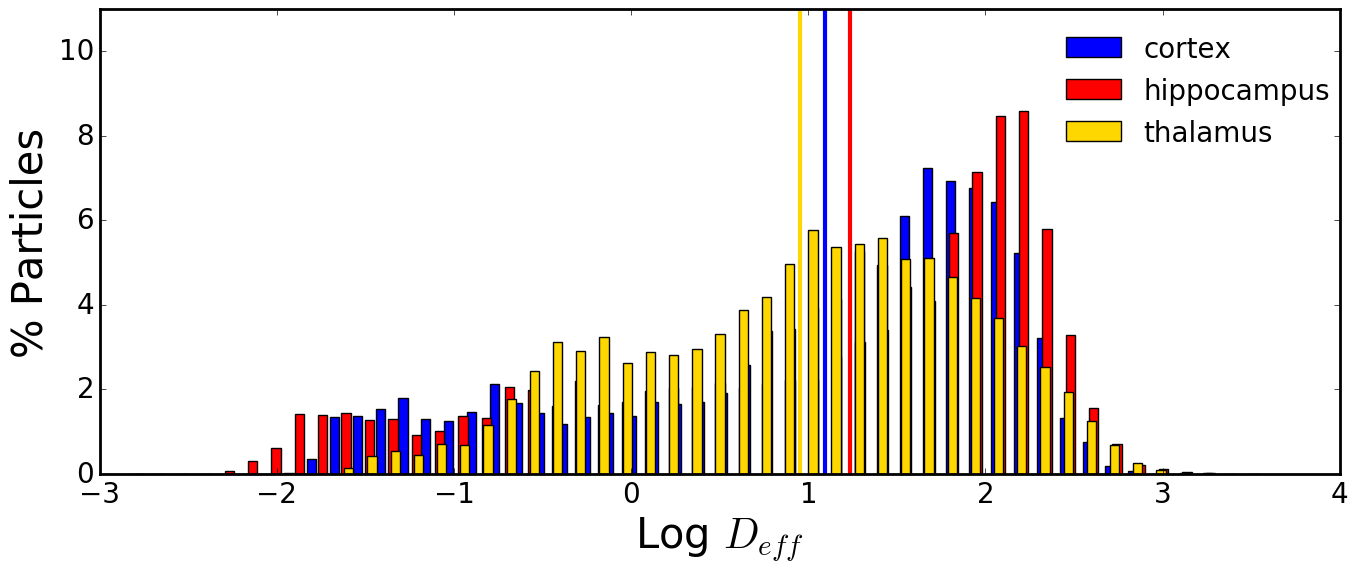

In [33]:
# Plot_general_histogram_code
cortex_avg = ma.average(cortex_Deff)+0.1
hippo_avg = np.average(hippo_Deff)+0.2
thalamus_avg = np.average(thalamus_Deff)
#plt.rcParams["patch.force_edgecolor"] = True
#fig = plt.figure(figsize=(22, 16), dpi=80)
fig = plt.figure(figsize=(16, 6), dpi=80)
plt.rc('axes', linewidth=2)
plot1 = cortex_Deff_hist
plot2 = hippo_Deff_hist
plot3 = thalamus_Deff_hist
c_bins = cortex_bins
h_bins = hippo_bins
t_bins = thalamus_bins
c_width = 0.4 * (c_bins[1] - c_bins[0])
h_width = 0.4 * (h_bins[1] - h_bins[0])
t_width = 0.4 * (t_bins[1] - t_bins[0])
c_center = (c_bins[:-1] + c_bins[1:])/2
h_center = (h_bins[:-1] + h_bins[1:])/2
t_center = (t_bins[:-1] + t_bins[1:])/2
plt.bar(c_center, plot1/sum(plot1)*100, align='center', width=c_width, color='blue', label='cortex')
plt.bar(h_center, plot2/sum(plot2)*100, align='center', width=h_width, color='red', label='hippocampus')
plt.bar(t_center, plot3/sum(plot3)*100, align='center', width=t_width, color='gold', label='thalamus')
plt.axvline(cortex_avg, color='blue', linewidth=3)
plt.axvline(hippo_avg, color='red', linewidth=3)
plt.axvline(thalamus_avg, color='gold', linewidth=3)
plt.xlabel('Log $D_{eff}$', fontsize=30)
plt.ylabel('% Particles', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)


plt.gca().set_ylim([0, 11])
plt.gca().set_xlim([-3, 4])

plt.legend(loc = (0.77, 0.68),fontsize=20, frameon=False)
plt.show()
#plt.savefig(folder+'PEG_hist.png', bbox_inches='tight')

In [ ]:
print(cortex_avg,hippo_avg,thalamus_avg)
print(cortex_avg/thalamus_avg)
print(hippo_avg/thalamus_avg)
print(thalamus_avg+0.2946*thalamus_avg)